In [246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import colors
import datetime
import math

In [247]:
SM = pd.read_csv('/Users/katelynyu/Documents/Github/South_meadow_flights_7Aug2017.csv',parse_dates=[['Date', 'Time']], low_memory= False)
SM.head()

,Date_Time,Pressure,Temperature,RH
0,8/8/17 1:05:09 AM,96755.0,2910.0,333.0
1,8/8/17 1:05:10 AM,96747.0,2908.0,336.0
2,8/8/17 1:05:11 AM,96753.0,2906.0,335.0
3,8/8/17 1:05:12 AM,96762.0,2906.0,328.0
4,8/8/17 1:05:13 AM,96750.0,2908.0,332.0


In [248]:
DF = SM[338:440]
M1 = SM[574:678]
M2 = SM[974:1090]
CM = SM[1211:1309]

Flights = [DF, M1, M2, CM]

DF.head()

,Date_Time,Pressure,Temperature,RH
338,8/8/17 1:10:45 AM,96703.0,2796.0,355.0
339,8/8/17 1:10:46 AM,96707.0,2799.0,356.0
340,8/8/17 1:10:47 AM,96709.0,2806.0,356.0
341,8/8/17 1:10:48 AM,96714.0,2798.0,356.0
342,8/8/17 1:10:49 AM,96700.0,2776.0,359.0


In [249]:
def ten(x):
    return x / 10
def thousand(x):
    return x / 1000

def svp(T):
    L = 2.5 * math.pow(10,6) #J/kg
    R_v = 461 #J /(kg K)
    return (.611 * math.exp((L/R_v)*((1/273)-(1/T))))

DF.loc[:,('Temperature')] = DF.loc[:,('Temperature')].apply(ten)
DF.loc[:,('RH')] = DF.loc[:,('RH')].apply(thousand) 
DF['SVP'] = DF['Temperature'].apply(svp)

M1.loc[:,('Temperature')] = M1.loc[:,('Temperature')].apply(ten)
M1.loc[:,('RH')] = M1.loc[:,('RH')].apply(thousand) 
M1['SVP'] = M1['Temperature'].apply(svp)

M2.loc[:,('Temperature')] = M2.loc[:,('Temperature')].apply(ten)
M2.loc[:,('RH')] = M2.loc[:,('RH')].apply(thousand) 
M2['SVP'] = M2['Temperature'].apply(svp)

CM.loc[:,('Temperature')] = CM.loc[:,('Temperature')].apply(ten)
CM.loc[:,('RH')] = CM.loc[:,('RH')].apply(thousand) 
CM['SVP'] = CM['Temperature'].apply(svp)


DF.head()
#for dataframe in Flights:
#    dataframe.loc[:,('Temperature')] = dataframe.loc[:,('Temperature')].apply(ten)
#    dataframe.loc[:,('Temperature')] = pd.to_numeric(dataframe.loc[:,('Temperature')])
#    dataframe.loc[:,('RH')] = dataframe.loc[:,('RH')].apply(thousand) 
#    dataframe['svp'] = svp(dataframe.loc[:,'Temperature'])

#M1.head()


/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.ht

,Date_Time,Pressure,Temperature,RH,SVP
338,8/8/17 1:10:45 AM,96703.0,279.6,0.355,0.976525
339,8/8/17 1:10:46 AM,96707.0,279.9,0.356,0.997038
340,8/8/17 1:10:47 AM,96709.0,280.6,0.356,1.046411
341,8/8/17 1:10:48 AM,96714.0,279.8,0.356,0.990158
342,8/8/17 1:10:49 AM,96700.0,277.6,0.359,0.849173


In [250]:
def partialpressure(RH, svp): #partial pressure of water vapor 
    return np.multiply(RH,svp)

DF['Partial P'] = np.multiply(DF['SVP'], DF['RH'])
M1['Partial P'] = np.multiply(M1['SVP'], M1['RH'])
M2['Partial P'] = np.multiply(M2['SVP'], M2['RH'])
CM['Partial P'] = np.multiply(CM['SVP'], CM['RH'])

DF.head()

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-cop

,Date_Time,Pressure,Temperature,RH,SVP,Partial P
338,8/8/17 1:10:45 AM,96703.0,279.6,0.355,0.976525,0.346666
339,8/8/17 1:10:46 AM,96707.0,279.9,0.356,0.997038,0.354945
340,8/8/17 1:10:47 AM,96709.0,280.6,0.356,1.046411,0.372522
341,8/8/17 1:10:48 AM,96714.0,279.8,0.356,0.990158,0.352496
342,8/8/17 1:10:49 AM,96700.0,277.6,0.359,0.849173,0.304853


In [251]:
DF['VPD_DF'] = DF['SVP'] - DF['Partial P']
M1['VPD_M1'] = M1['SVP'] - M1['Partial P']
M2['VPD_M2'] = M2['SVP'] - M2['Partial P']
CM['VPD_CM'] = CM['SVP'] - CM['Partial P']

print(DF)

             Date_Time  Pressure  Temperature     RH       SVP  Partial P  \
338  8/8/17 1:10:45 AM   96703.0        279.6  0.355  0.976525   0.346666   
339  8/8/17 1:10:46 AM   96707.0        279.9  0.356  0.997038   0.354945   
340  8/8/17 1:10:47 AM   96709.0        280.6  0.356  1.046411   0.372522   
341  8/8/17 1:10:48 AM   96714.0        279.8  0.356  0.990158   0.352496   
342  8/8/17 1:10:49 AM   96700.0        277.6  0.359  0.849173   0.304853   
343  8/8/17 1:10:50 AM   96705.0        279.2  0.359  0.949763   0.340965   
344  8/8/17 1:10:51 AM   96705.0        278.9  0.363  0.930126   0.337636   
345  8/8/17 1:10:52 AM   96704.0        279.7  0.362  0.983320   0.355962   
346  8/8/17 1:10:53 AM   96719.0        281.1  0.362  1.083009   0.392049   
347  8/8/17 1:10:54 AM   96708.0        280.3  0.361  1.024989   0.370021   
348  8/8/17 1:10:55 AM   96707.0        280.4  0.360  1.032086   0.371551   
349  8/8/17 1:10:56 AM   96704.0        281.2  0.359  1.090464   0.391477   

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://panda

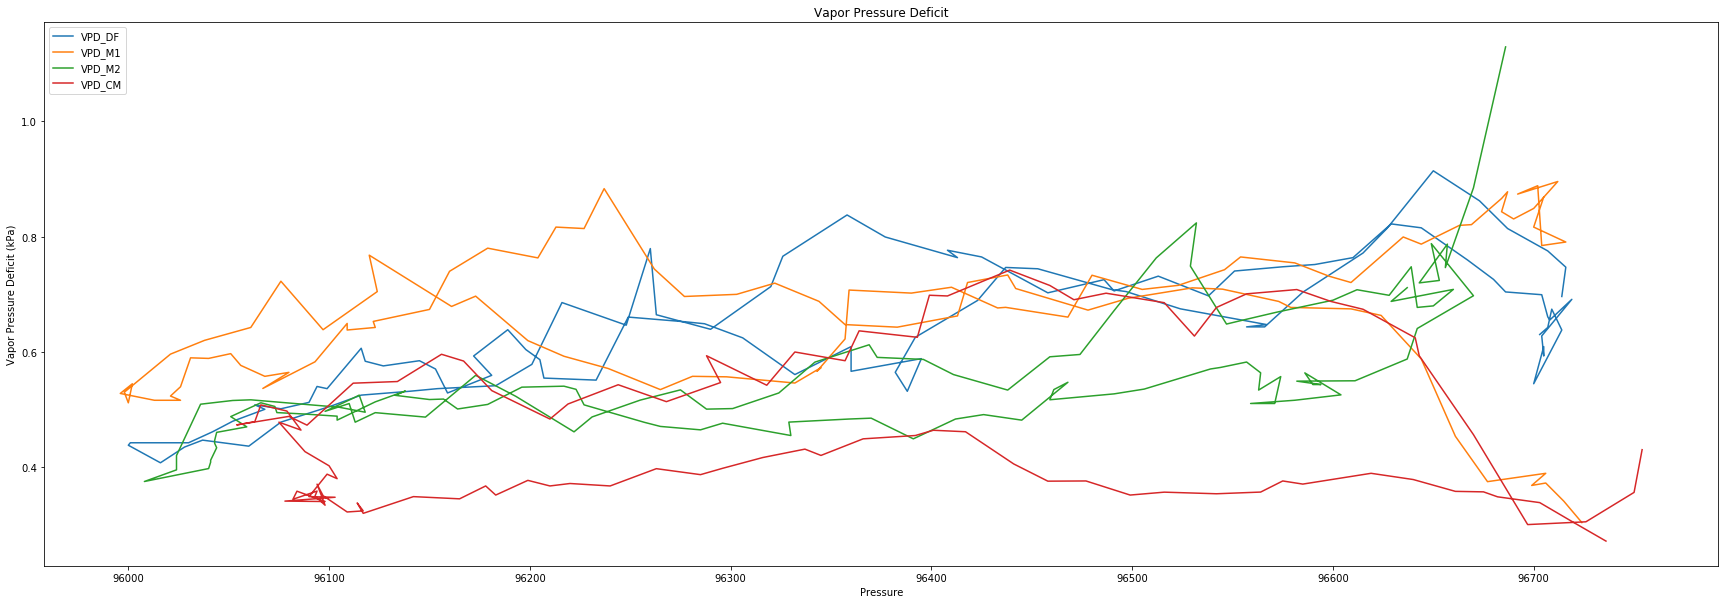

In [252]:
def legend(title, xaxis, yaxis):
    plt.title(title)
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    ax = plt.gca()
    legend = ax.legend(loc='upper left')

plt.figure(figsize = (30,10))
plt.plot(DF['Pressure'], DF['VPD_DF'])
plt.plot(M1['Pressure'], M1['VPD_M1'])
plt.plot(M2['Pressure'], M2['VPD_M2'])
plt.plot(CM['Pressure'], CM['VPD_CM'])
legend('Vapor Pressure Deficit','Pressure', 'Vapor Pressure Deficit (kPa)')
plt.show()

In [253]:
DF_sorted = DF.sort_values('Pressure')
#DF_sorted.groupby(np.arange(len(DF)//2)).mean()
DF_sorted.head()

,Date_Time,Pressure,Temperature,RH,SVP,Partial P,VPD_DF
387,8/8/17 1:11:34 AM,96000.0,274.4,0.353,0.676171,0.238688,0.437483
388,8/8/17 1:11:35 AM,96001.0,274.6,0.356,0.685974,0.244207,0.441767
386,8/8/17 1:11:33 AM,96016.0,273.4,0.353,0.629018,0.222043,0.406975
385,8/8/17 1:11:32 AM,96028.0,274.3,0.353,0.671317,0.236975,0.434342
389,8/8/17 1:11:36 AM,96030.0,274.6,0.356,0.685974,0.244207,0.441767


In [254]:
DF_sorted.groups.keys()

AttributeError: 'DataFrame' object has no attribute 'groups'